### Citations/Acknowledgements


### Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

### https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

### Goal: Predict which patients are at risk of being readmitted within 30 days of discharge.

# 

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [46]:
# Load the dataset
data = pd.read_csv("C:/Users/Hosam/Desktop/Projects/Hospital Readmission/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv")

In [47]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [48]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 50 entries, encounter_id to readmitted
dtypes: int64(13), object(37)
memory usage: 38.8+ MB


In [49]:
data.columns.values.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Handling Null Values

In [51]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Display columns with missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


#### I will drop max_glu_serum, A1Cresult, weight columns because they contain more than 75% null values                                       

#### I will drop also drop irrelevant columns to use this data as feature                  

In [58]:
# Drop columns with too many missing values
drop_col = ['weight', 'max_glu_serum', 'A1Cresult', 'encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
data.drop(columns=drop_col, inplace=True)



In [59]:
data

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,<NA>,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,<NA>,<NA>,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,<NA>,<NA>,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,<NA>,<NA>,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,<NA>,<NA>,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,MC,<NA>,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,MC,<NA>,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,MC,<NA>,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,MC,Surgery-General,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [60]:
#fixing the rest of null values
data['race'].fillna(data['race'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns
data['payer_code'].fillna(data['payer_code'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns
data['medical_specialty'].fillna(data['medical_specialty'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns
data['diag_1'].fillna(data['diag_1'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns
data['diag_2'].fillna(data['diag_2'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns
data['diag_3'].fillna(data['diag_3'].mode()[0], inplace=True)  # Replace NaN with mode for numeric columns

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   time_in_hospital          101766 non-null  int64 
 4   payer_code                101766 non-null  object
 5   medical_specialty         101766 non-null  object
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

# Categorical Data Handling 

In [64]:
# Convert categorical columns to dummy variables
categorical_columns = data.select_dtypes(include=['object']).columns
data_with_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

bool_columns = data_with_dummies.select_dtypes(include=['bool']).columns
data_with_dummies[bool_columns] = data_with_dummies[bool_columns].astype(int)

In [65]:
data_with_dummies.dtypes.value_counts()

int32    2404
int64       8
Name: count, dtype: int64

In [66]:
data_with_dummies

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted_>30,readmitted_NO
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,1,0,1
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,0,1,0,1
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,0,0,...,0,0,0,0,0,0,0,1,1,0
101762,5,33,3,18,0,0,1,9,0,0,...,0,0,0,0,0,0,1,1,0,1
101763,1,53,0,9,1,0,0,13,0,1,...,0,0,0,0,0,0,0,1,0,1
101764,10,45,2,21,0,0,1,9,0,1,...,0,0,0,0,0,0,0,1,0,1


#

# EDA

C:\Users\Hosam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


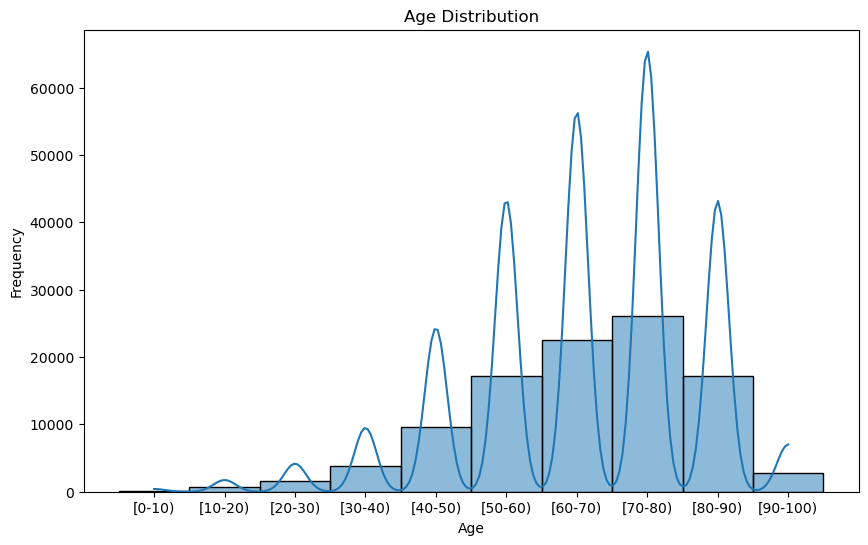

In [71]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

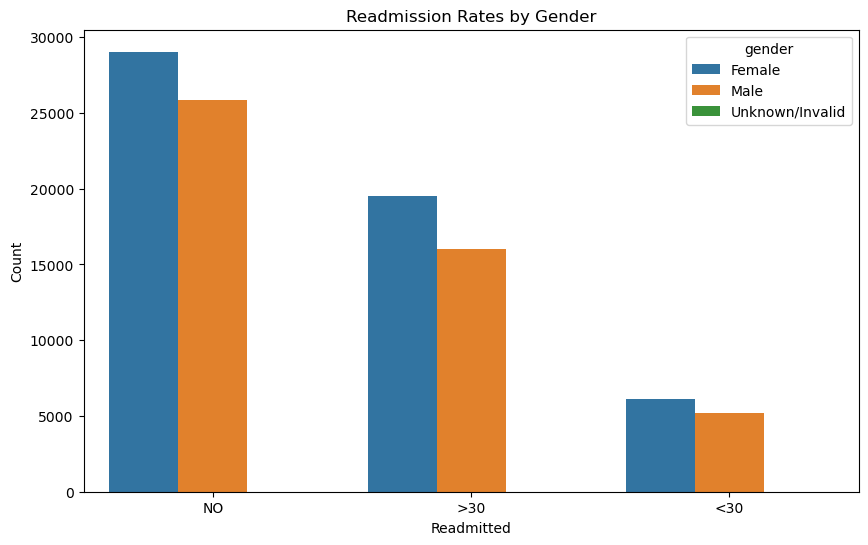

In [73]:
# Distribution of readmission rates by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='readmitted', hue='gender', data=data)
plt.title('Readmission Rates by Gender')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

In [74]:
data[['readmitted','race']].value_counts()

readmitted  race           
NO          Caucasian          41930
>30         Caucasian          27662
NO          AfricanAmerican    10421
<30         Caucasian           8780
>30         AfricanAmerican     6634
<30         AfricanAmerican     2155
NO          Hispanic            1183
            Other                915
>30         Hispanic             642
            Other                446
NO          Asian                415
<30         Hispanic             212
>30         Asian                161
<30         Other                145
            Asian                 65
Name: count, dtype: int64

# Machine Learning Models

### Data Preparation

In [78]:
# Assigning X for the features and Y for target variable
x = data_with_dummies.drop(columns=['readmitted_>30'], axis=1)
y = data_with_dummies['readmitted_>30']




In [79]:
x=data_with_dummies.drop('readmitted_>30',axis=1)
y=data_with_dummies['readmitted_>30']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print ('The shape of X_train is: ' + str(X_train_scaled.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('m = %d training examples' % (len(y_train)))

The shape of X_train is: (81412, 2411)
The shape of y_train is: (81412,)
m = 81412 training examples


### Logistic Regression

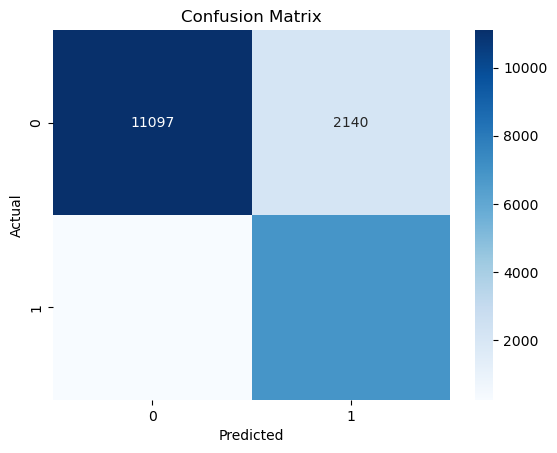

In [81]:
# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
classification_report_str = classification_report(y_test, y_pred)  # Call the function to get the report
confusion_matrix_str = str(confusion_matrix(y_test, y_pred))  # Convert confusion matrix to string
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save the results to a text file
with open("C:/Users/Hosam/Desktop/Projects/Hospital Readmission/logistic_regression_results.txt", 'w') as f:
    f.write("Logistic Regression Model:\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report_str + "\n")
    f.write("Confusion Matrix:\n")
    f.write(confusion_matrix_str + "\n")
    f.write("ROC AUC Score:\n")
    f.write(str(roc_auc) + "\n")


# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("C:/Users/Hosam/Desktop/Projects/Hospital Readmission/confusion_matrix_logistic_regression.png")
plt.show()

# Random Forest Model


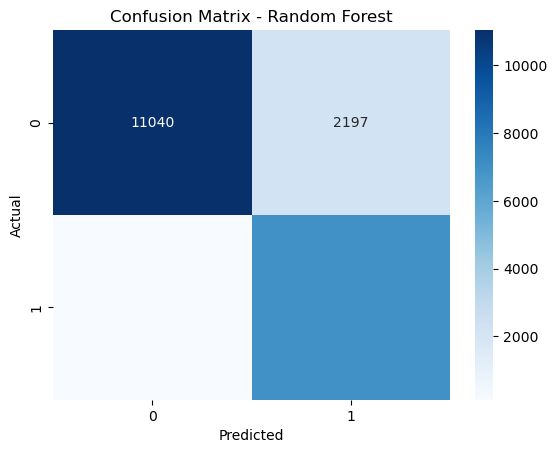

In [87]:
# Train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_proba_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = str(confusion_matrix(y_test, y_pred_rf))
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

with open("C:/Users/Hosam/Desktop/Projects/Hospital Readmission/random_forest_results.txt", 'w') as f:
    f.write("Random Forest Model:\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report_rf + "\n")
    f.write("Confusion Matrix:\n")
    f.write(confusion_matrix_rf + "\n")
    f.write("ROC AUC Score:\n")
    f.write(str(roc_auc) + "\n")
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("C:/Users/Hosam/Desktop/Projects/Hospital Readmission/confusion_matrix_random_forest.png")
plt.show()


In [3]:
summary = f"""
===============================
1) Evaluation Metrics with Logistic Regression:
------------------------------------------
-Classification Report:

Precision:
Class 0: 0.98
Class 1: 0.76

Recall:
Class 0: 0.84
Class 1: 0.96

F1-Score:
Class 0: 0.90
Class 1: 0.85

Accuracy: 0.88

ROC AUC Score: 0.929

-Confusion Matrix:

True Positives (TP): 6863
True Negatives (TN): 11097
False Positives (FP): 2140
False Negatives (FN): 254


2) Evaluation Metrics with Random Forest:
------------------------------------------
-Classification Report:

Precision:
Class 0: 0.99
Class 1: 0.76

Recall:
Class 0: 0.83
Class 1: 0.98

F1-Score:
Class 0: 0.90
Class 1: 0.86

Accuracy: 0.89

ROC AUC Score: 0.922

-Confusion Matrix:

True Positives (TP): 6985
True Negatives (TN): 11040
False Positives (FP): 2197
False Negatives (FN): 132
"""

print(summary)



1) Evaluation Metrics with Logistic Regression:
------------------------------------------
-Classification Report:

Precision:
Class 0: 0.98
Class 1: 0.76

Recall:
Class 0: 0.84
Class 1: 0.96

F1-Score:
Class 0: 0.90
Class 1: 0.85

Accuracy: 0.88

ROC AUC Score: 0.929

-Confusion Matrix:

True Positives (TP): 6863
True Negatives (TN): 11097
False Positives (FP): 2140
False Negatives (FN): 254


2) Evaluation Metrics with Random Forest:
------------------------------------------
-Classification Report:

Precision:
Class 0: 0.99
Class 1: 0.76

Recall:
Class 0: 0.83
Class 1: 0.98

F1-Score:
Class 0: 0.90
Class 1: 0.86

Accuracy: 0.89

ROC AUC Score: 0.922

-Confusion Matrix:

True Positives (TP): 6985
True Negatives (TN): 11040
False Positives (FP): 2197
False Negatives (FN): 132



### 
Precision: Both models have high precision for Class 0. For Class 1, both models have similar precision (0.76).

Recall: Logistic Regression has a higher recall for Class 0 (0.84 vs. 0.83) but lower for Class 1 (0.96 vs. 0.98).

F1-Score: Similar F1-scores for both models in both classes.

Accuracy: Random Forest slightly better than Logistic Regression (0.89 vs. 0.88).

ROC AUC Score: Logistic Regression has a slightly higher ROC AUC score (0.929 vs. 0.922).